# Capstone Project 2: Data Wrangling
The goal of this project is to predict the presence of heart disease – either coronary artery disease (CAD) or myocardial infarction (MI, a.k.a heart attacks) – in an individual given some of its medical and lifestyle features.

The work on this notebook corresponds to the Data Wrangling step of the project.

## Table of Contents
* [1 Import Relevant Packages](#1-Import-Relevant-Packages)
* [2 Load Data](#2-Load-Data)
* [3 Basic Description of Data](#3-Basic-Description-of-Data)
* [4 Data Cleaning](#4-Data-Cleaning)
    * [4.1 Cleaning the Columns with "object" Data Types](#4.1-Cleaning-the-Columns-with-"object"-Data-Types)
    * [4.2 Removing Empty Columns](#4.2-Removing-Empty-Columns)
    * [4.3 Missing Values](#4.3-Missing-Values)
    * [4.4 Changing Data Type of Categorical Features to "category"](#4.4-Changing-Data-Type-of-Categorical-Features-to-"category")
* [5 Description of Final Dataframe](#5-Description-of-Final-Dataframe)
* [6 Exporting the Final Dataframe and Final Remarks](#6-Exporting-the-Final-Dataframe-and-Final-Remarks)

## 1 Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## 2 Load Data

In [2]:
'''Since the dataframe has over 400,000 rows, the kernel sometimes stalls when loading it. Reading the
dataframe in chunks of 100,000 rows and then concatenating them seems to prevent this.'''

#The first time the nobook is run, it reads the DataFrame from a .csv file and then stores a pickled 
#version of it locally. If the notebook needs to be run a second time, it will read directly from the 
#pickled file instead.
if not Path('../Data/2015.pkl').exists(): #Don't load from .csv if pickled file exists.
    #Name the path of the data and create a generator for the chunks.
    path_in = '../Data/2015.zip'
    df_gen = pd.read_csv(path_in, compression='zip', chunksize = 100000)

    #Loop that concatenates the chunks. Output the raw data.
    df_raw = next(df_gen)
    for d in df_gen:
        df_raw = pd.concat([df_raw, d])
    
    df_raw.to_pickle('../Data/2015.pkl') #Save pickled version to improve loading times next time.
    
else: #If there is a pickled file, read from it instead.
    df_raw = pd.read_pickle('../Data/2015.pkl')

## 3 Basic Description of Data
The data comprises over 400,000 rows corresponding to survey respondents and over 300 columns corresponding to answers to survey questions. The majority of survey answers are number coded. For example, the column `BPHIGH4`, corresponding to the question "Have you ever been told by a doctor \[...\] that you have high blood pressure?", has six possible answers: A value of "1" corresponds to "Yes"; a value of "2" corresponds to "Yes, but female and told only during pregnancy"; a value of "3" corresponds to "No"; and other numbers correspond to other answers. The description of these numeric codes is found in pdf files provided by the CDC called "codebooks", which can be found in the "Capstone_Project_2/Data" directory.

The questions and the answers can be very specific. However, some columns in the data frame are "calculated variables" that use the answers of combinations of different questions to arrive at a useful quantity or categorical label. For example, the column `_BMI5CAT` categorizes each survey participant into five different weight categories (normal weight, overweight, obese, etc.) by calculating the BMI index of each participant by using the answers to questions about height and weight.

In [3]:
df_raw.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


## 4 Data Cleaning

### 4.1 Cleaning the Columns with "object" Data Types

**Examining the columns with data type "object".**

In [5]:
cols_obj_dtypes = df_raw.select_dtypes(include='object').columns

In [6]:
df_raw[cols_obj_dtypes].head()

,IDATE,IMONTH,IDAY,IYEAR,PCDMDECN,EXACTOT1,EXACTOT2
0,b'01292015',b'01',b'29',b'2015',b'',b'',b''
1,b'01202015',b'01',b'20',b'2015',b'',b'',b''
2,b'02012015',b'02',b'01',b'2015',b'',b'',b''
3,b'01142015',b'01',b'14',b'2015',b'',b'',b''
4,b'01142015',b'01',b'14',b'2015',b'',b'',b''


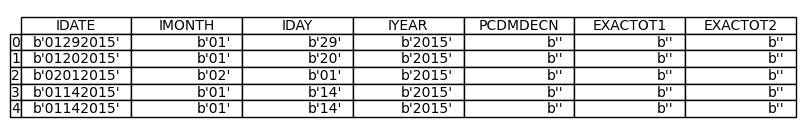

In [11]:
from my_package.functions import make_image_table
make_image_table(df_raw[cols_obj_dtypes].head(), (10, 10))

**Checking the names of columns with object data types, whether they have null value entries, and the first 10 entries of their unique values.**

In [ ]:
print('\nNames of columns with object data types:')
print(list(cols_obj_dtypes), '\n')

print('Number of unique values:')
for c in cols_obj_dtypes:
    print(f'{c}:', df_raw[c].unique().shape[0])

print('\nNull values in each of these columns:')
print(df_raw[cols_obj_dtypes].isnull().sum(), '\n')

print('First 10 unique values of each of these columns:')
for c in cols_obj_dtypes:
    print(f'{c}:', df_raw[c].unique()[:10])


Names of columns with object data types:
['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN', 'EXACTOT1', 'EXACTOT2'] 

Number of unique values:
IDATE: 415
IMONTH: 12
IDAY: 31
IYEAR: 2
PCDMDECN: 12
EXACTOT1: 5642
EXACTOT2: 7623

Null values in each of these columns:
IDATE       0
IMONTH      0
IDAY        0
IYEAR       0
PCDMDECN    0
EXACTOT1    0
EXACTOT2    0
dtype: int64 

First 10 unique values of each of these columns:
IDATE: ["b'01292015'" "b'01202015'" "b'02012015'" "b'01142015'" "b'01052015'"
 "b'01132015'" "b'01302015'" "b'01222015'" "b'01162015'" "b'01042015'"]
IMONTH: ["b'01'" "b'02'" "b'03'" "b'04'" "b'05'" "b'06'" "b'07'" "b'08'" "b'09'"
 "b'10'"]
IDAY: ["b'29'" "b'20'" "b'01'" "b'14'" "b'05'" "b'13'" "b'30'" "b'22'" "b'16'"
 "b'04'"]
IYEAR: ["b'2015'" "b'2016'"]
PCDMDECN: ["b''" "b'1'" "b'12'" "b'2'" "b'7'" "b'9'" "b'3'" "b'21'" "b'13'" "b'4'"]
EXACTOT1: ["b''" "b'Physical Therapy'" "b'Streching'" "b'rope exer. shoulder'"
 "b'leg lifting'" "b'upper body exercises'" "b'built

As can be seen from the previous two cell outputs, the columns `IDATE`, `IMONTH`, `IDAY`, and `IYEAR` are clearly meant to be date entries. After consulting the codebook from the CDC from this dataset, the entries for the column `PCDMDECN` are numeric categorical values just like almost all other columns in the data set. It is not known why the values for this particular column are formatted in this way. The entries for the columns `EXACTOT1` and `EXACTOT2` are therefore the only non-numeric entries in the data set.

**Cleaning the values from the columns with "object" data types**  
I will remove the "b's" and single quotes from these columns.

In [ ]:
df2 = df_raw.copy() #So that the raw DataFrame needs to be loaded only once if we need to redo our steps.
for c in cols_obj_dtypes:
    df2.loc[:, c]= df2.loc[:, c].apply(lambda x: np.nan if x == "b''" else x.lstrip("b'").rstrip("'"))

In [ ]:
df2[cols_obj_dtypes].head()

,IDATE,IMONTH,IDAY,IYEAR,PCDMDECN,EXACTOT1,EXACTOT2
0,01292015,01,29,2015,NaN,NaN,NaN
1,01202015,01,20,2015,NaN,NaN,NaN
2,02012015,02,01,2015,NaN,NaN,NaN
3,01142015,01,14,2015,NaN,NaN,NaN
4,01142015,01,14,2015,NaN,NaN,NaN


**Converting the entries in the `IDATE` columns to datetime objects**

In [ ]:
#Before applying the "to_datetime" method, the date need to be formatted in the MM/DD/YYYY format.
df2['IDATE'] = pd.to_datetime(df2['IDATE'].map(lambda x: x[0:2] + '/' + x[2:4] + '/' + x[4:]))

In [ ]:
df2['IDATE'].head()

0   2015-01-29
1   2015-01-20
2   2015-02-01
3   2015-01-14
4   2015-01-14
Name: IDATE, dtype: datetime64[ns]

**Changing the dtypes of the columns `IMONTH`, `IDAY`, `IYEAR` and `PCDMDECN` to "float"**

In [ ]:
for c in ['IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN']:
    df2[c] = df2[c].astype(float)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: datetime64[ns](1), float64(327), object(2)
memory usage: 1.1+ GB


The DataFrame's two truly non-numeric columns now have their dtypes as "object" and the only date column with date entries has dtype datetime.

### 4.2 Removing Empty Columns

After examining the codebook, I found out that, for this particular instance of the survey, four of the columns are completely empty. I will first check to verify that this is indeed true.

In [ ]:
cols_empty = ['PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2']
print('Number of non-null entries for the following columns:')
for c in cols_empty:
    print(f'{c}:', (~df2[c].isnull()).sum())

Number of non-null entries for the following columns:
PAINACT2: 0
QLMENTL2: 0
QLSTRES2: 0
QLHLTH2: 0


These four columns are indeed completely empty, so I will now drop them.

In [ ]:
#The DataFrame will be altered by chunks — it will be split into different DataFrames with n number of 
#rows, the columns of each of them will be dropped, and then they will be concatenated.
n = 10000 #Chunk size
df_conc = pd.DataFrame() #Empty DataFrame. Will be used to concatenate altered DataFrames.
k = df2.shape[0] // n #Number of DataFrames from the split, rounded down.

#Loops over each chunk. Columns are dropped for each chunk, and the concatenated into df_conc.
for i in range(k + 1): 
    df_temp = df2.loc[i * n:(i + 1) * n - 1, :].drop(cols_empty, axis=1)
    df_conc = pd.concat([df_conc, df_temp])
df2 = df_conc

In [ ]:
print('Columns remaining:', df2.columns.shape[0])

Columns remaining: 326


Note how the total number of columns in the DataFrame is now less.

### 4.3 Missing Values  
I will now check the proportion of missing values of columns and examine the distribution of these proportions.

In [ ]:
s_prop_null = df2.isnull().sum() / df2.shape[0]
s_prop_null.name = 'Proportion of Null Values in Columns'

In [ ]:
s_prop_null.head()

_STATE    0.0
FMONTH    0.0
IDATE     0.0
IMONTH    0.0
IDAY      0.0
Name: Proportion of Null Values in Columns, dtype: float64

**Boxplot and histogram of proportion of missing values of all columns.**

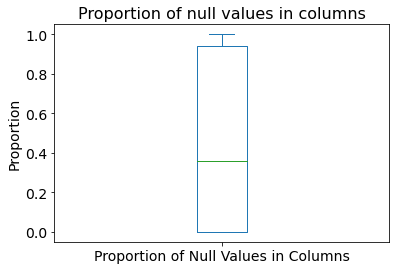

In [ ]:
s_prop_null.plot.box(fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of null values in columns', fontsize=16)
plt.show()

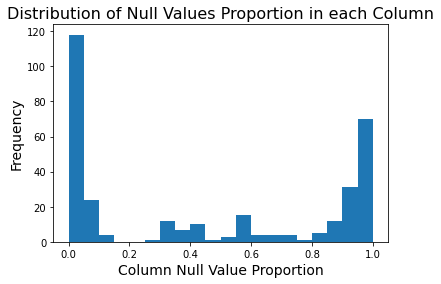

In [ ]:
s_prop_null.plot.hist(bins=20)
plt.title('Distribution of Null Values Proportion in each Column', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Column Null Value Proportion', fontsize=14)
plt.show()

It appears that a large proportion of columns are missing less than 15% of their values.
It also appears that a large proportion of the columns are missing more than about 90% of their values. The nature of the questions asked in those columns might offer an explanation as to why they are more likely to have null values. This will be explored at a later time.

In [ ]:
#Checking proportion of total columns that are missing less than 15% of their values and that are missing 
#more than 90% of their values.
prop_lt_15 = s_prop_null[s_prop_null <= 0.15].shape[0] / df2.shape[1]
prop_gt_90 = s_prop_null[s_prop_null >= 0.90].shape[0] / df2.shape[1]
print('Proportion of columns missing less than 15% of their values:', prop_lt_15)
print('Proportion of columns missing more than 90% of their values:', prop_gt_90)
print('Total proportion of columns among these two groups:', prop_lt_15 + prop_gt_90)

Proportion of columns missing less than 15% of their values: 0.44785276073619634
Proportion of columns missing more than 90% of their values: 0.3098159509202454
Total proportion of columns among these two groups: 0.7576687116564418


### 4.4 Changing Data Type of Categorical Features to "category"

After consulting the codebook, I realized that, while most of the remaining 326 columns contain numeric categorical values, a small fraction of them are non-categorical. I will now proceed to change the dtype of the categorical columns to "category".

**Important Note:** We have to be aware that the columns that contain non-categorical values will still have some values that are meant to represent categories. For example, in the column `WEIGHT2`, in which each entry corresponds to the weight of the survey respondent, a value of "7777" represents an answer of "Don't know/Not sure", while a value of "9999" represents "Refused (to answer)". The details of the meaning of the codes for each of the columns are given in the codebook found in Capstone_Project_2/Data/codebook15_llcpc.pdf.

In [ ]:
#List of column names with "float" dtype
cols_float = df2.select_dtypes(include='float').columns

#List of column names that are non-categorical
cols_non_cat = ['NUMADULT', 'NUMMEN', 'NUMWOMEN', 'HHADULT', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',\
                'DIABAGE2', 'NUMPHON2', 'CHILDREN', 'WEIGHT2', 'HEIGHT3', 'ALCDAY5', 'AVEDRNK2',\
                'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG',\
                'VEGETAB1', 'EXEROFT1', 'EXERHMM1', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'BLDSUGAR'\
                , 'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'LONGWTCH', 'ASTHMAGE', 'ASERVIST'\
                , 'ASDRVIST', 'ASRCHKUP', 'ASACTLIM', 'SCNTWRK1', 'SCNTLWK1', 'ADPLEASR', 'ADDOWN',\
                'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', '_STSTR', '_STRWT',\
                '_RAWRAKE', '_WT2RAKE', '_CLLCPWT', '_DUALCOR', '_LLCPWT', '_AGE80', 'HTIN4', 'HTM4',\
                'WTKG3', '_BMI5', '_CHLDCNT', 'DROCDY3_', '_DRNKWEK', 'FTJUDA1_', 'FRUTDA1_', 'BEANDAY_',\
                'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', '_MISFRTN', '_MISVEGN', '_FRUTSUM', '_VEGESUM',\
                'METVL11_', 'METVL21_', 'MAXVO2_', 'FC60_', 'PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_',\
                '_MINAC11', '_MINAC21', 'STRFREQ_', 'PAMIN11_', 'PAMIN21_', 'PA1MIN_', 'PAVIG11_', 'PAVIG21_',\
                'PA1VIGM_']

#List of column names that will be converted to "category" dtype. In other words, all float columns of the 
#DataFrame not in in the list cols_non_cat.
cols_to_cat = [c for c in cols_float if c not in cols_non_cat]

#This checks that no typos were made when defining "cols_non_cat"
assert len(cols_float) == len(cols_non_cat) + len(cols_to_cat)

In [ ]:
df2.loc[:, cols_to_cat] = df2.loc[:, cols_to_cat].astype('category')
df_clean = df2 #Final, cleaned DataFrame

## 5 Description of Final Dataframe

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 326 entries, _STATE to _AIDTST3
dtypes: category(233), datetime64[ns](1), float64(90), object(2)
memory usage: 414.0+ MB


**The cleaned DataFrame has 441456 rows and 326 columns. Among the columns, one of them has datetime values, 90 of them have non-categorical values, and the remaining 233 have numeric categorical values.**

In [ ]:
df_clean.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,2015-01-29,1.0,29.0,2015.0,1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,2015-01-20,1.0,20.0,2015.0,1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,2015-02-01,2.0,1.0,2015.0,1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,2015-01-14,1.0,14.0,2015.0,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,2015-01-14,1.0,14.0,2015.0,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


## 6 Exporting the Final Dataframe and Final Remarks

In [ ]:
path_out = '../Data/2015_clean.zip'
df_clean.to_csv(path_out, compression='zip', index=False)

In this notebook, we cleaned our raw DataFrame. This involved removing unwanted characters from the only two columns that have non-numeric values, casting the column that contains dates into datetime objects, dropping four columns that are entirely empty, and changing the dtype of columns with numeric categorical values to "category". All in all, we have a DataFrame that contains one column with datetime object values, 90 columns with non-categorical values, and 233 columns with categorical values.

In the next part of the project, I will undergo Exploratory Data Analysis (EDA) on the cleaned DataFrame, which will allow me to better understand the properties of the data in each column as well as the relationship of the data between different columns.